# Monte Carlo Analysis
This notebook explores the conditions under which a Monte Carlo Simulation maybe modeled using a simpler simulation.

## Module Imports

In [1]:
from pyMez.Code.Analysis.Fitting import *

Importing pyMez, this should take roughly 30 seconds
Importing Code.DataHandlers.GeneralModels
It took 1.911 s to import Code.DataHandlers.GeneralModels
Importing Code.DataHandlers.HTMLModels
It took 0.325 s to import Code.DataHandlers.HTMLModels
Importing Code.DataHandlers.NISTModels
It took 5.78 s to import Code.DataHandlers.NISTModels
Importing Code.DataHandlers.TouchstoneModels
It took 0.01 s to import Code.DataHandlers.TouchstoneModels
Importing Code.DataHandlers.XMLModels
It took 0.143 s to import Code.DataHandlers.XMLModels
Importing Code.DataHandlers.ZipModels
It took 0.012 s to import Code.DataHandlers.ZipModels
Importing Code.InstrumentControl.Experiments
It took 0.679 s to import Code.InstrumentControl.Experiments
Importing Code.InstrumentControl.Instruments
It took 0.006 s to import Code.InstrumentControl.Instruments
Importing Code.Utils.Names
It took 0.004 s to import Code.Utils.Names
It took 8.871 s to import all of the active modules


## Constructing a 1-D model

In [2]:
# we begin with a very simple model of a line
parameter_definition_dictionary=["m":{"center":2.0,"width":1.0,"distribution":"normal"},
                                 "b":{"center":1.0,"width":.01,"distribution":"normal"}]
line=FunctionalModel(parameters="m b", variables="x",equation="m*x+b")

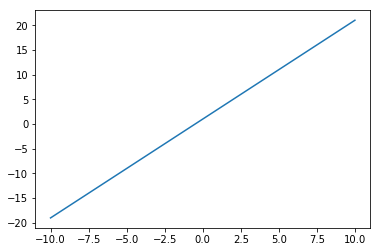

In [23]:
# plot of this model for a fixed parameter value
parameter_values={"m":2.0,"b":1.0}
line.set_parameters(parameter_values)
x_data=np.linspace(-10,10,1024)
plt.plot(x_data,line(x_data))
plt.show()

## Creating a probability distribution function for the parameters

In [24]:
number_relizations=1000
m_center=2.0
m_width=.2
b_center=1.0
b_width=.01
np.random.seed(1)
m_pdf=np.random.normal(loc=m_center,scale=m_width,size=number_relizations)

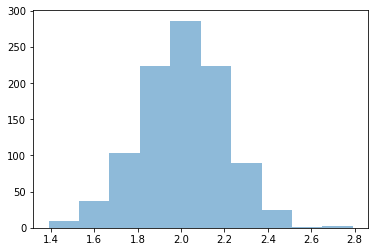

In [25]:
plt.hist(m_pdf,alpha=.5)
plt.show()

In [26]:
b_pdf=np.random.normal(loc=b_center,scale=b_width,size=number_relizations)

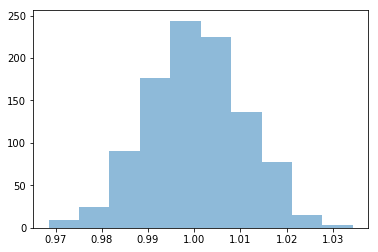

In [27]:
plt.hist(b_pdf,alpha=.5)
plt.show()

## Realization of the Model for each Monte Carlo Trial

In [11]:
# Now we can plot the model for every realilation
realized_model_list=[]
for index, m_value in enumerate(m_pdf):
    line.set_parameters(b=b_pdf[index],m=m_value)
    realized_model_list.append(line(x_data))
    

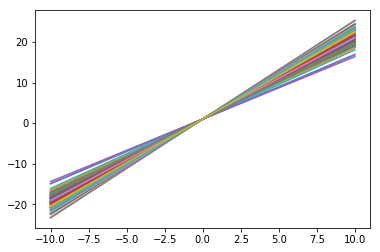

In [13]:
for realized_model in realized_model_list[1:100]:
    plt.plot(x_data,realized_model)
plt.show()

## Calculation of Nominal Value and Statistically Biased Mean

In [17]:
# now we can define a statistical biased mean (mean of realizations) and a nominal value 
#(model evaluated at the expectation values of the variables) 
statitically_biased_mean=np.mean(realized_model_list,axis=0)

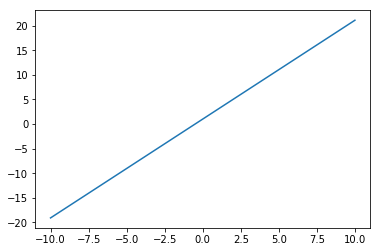

In [18]:
plt.plot(x_data,statitically_biased_mean)
plt.show()

In [19]:
m_mean=np.mean(m_pdf)
b_mean=np.mean(b_pdf)
line.set_parameters(**{"m":m_mean,"b":b_mean})
nominal_value=line(x_data)

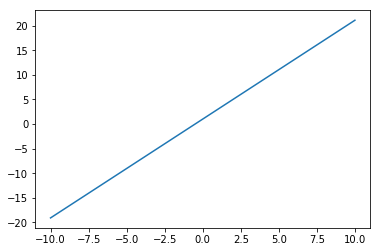

In [20]:
plt.plot(x_data,nominal_value)
plt.show()

## Statistics of the Monte Carlo trial

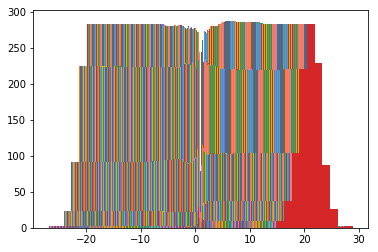

In [22]:
for point_index in range(len(realized_model_list[0])):
    point_realizations=[realized_model_list[i][point_index] for i,realization in enumerate(realized_model_list)]
    plt.hist(point_realizations)
plt.show()

## Error models
We can create two different formulations of error, one based on the nominal value and the covariance and one based on the statistically biased mean and the uncertainty in the Monte Carlo trials. In this simple case they should be the same.

In [28]:
montecarlo_error=np.std(realized_model_list,axis=0)

In [29]:
len(montecarlo_error)

1024

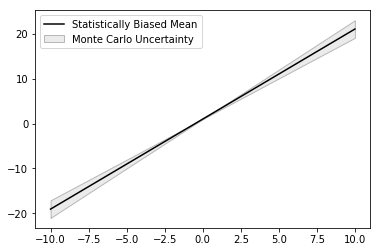

In [32]:
plt.fill_between(x_data,statitically_biased_mean-montecarlo_error,statitically_biased_mean+montecarlo_error,
                 edgecolor=(0, .0, .0, .25),
                        facecolor=(.25, .25, .25, .1),
                        linewidth=1,label="Monte Carlo Uncertainty")
plt.plot(x_data,statitically_biased_mean,'k',label="Statistically Biased Mean")
plt.legend()
plt.show()

In [ ]:
# now we create a covariance list which has a value per parameter 
# the covariance is simply the expectation of a parameter + single width for each parameter 
covariance_list=[]
for parameter in parameter_definition.keys():
    line.set_parameters()